# Normal Distribution

Date published: 2018-11-30

Category: Math

Subcategory: Distributions

Tags: normal distribution, standard deviation, python, pandas


A **normal distribution** has values in which the data has no bias left or right from its central value.

Many sets of data closely follow a normal distribution including:

- heights of people
- grades on tests

### Import Modules

In [149]:
import seaborn as sns
import numpy as np
import scipy
import warnings
import matplotlib.pyplot as plt
% matplotlib inline

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [150]:
warnings.filterwarnings('ignore')

Visualization styling code

In [151]:
sns.set(rc={'figure.figsize':(12.5, 9.5)})
sns.set_context('talk')

### Example 1: Build a Normal Distribution

Using the `numpy` package's `random` module, we can call the `normal()` method to create a list of values with a normal distribution by setting the following arguments:

- `loc` as the mean of the distribution
- `scale` as the standard deviation of the distribution
- `size` as number of samples

In [152]:
np.random.seed(4) # seed random number generator with fixed value so we always get same values below
normal_distr_values = list(np.random.normal(loc=100, scale=20, size=1300))

In [153]:
normal_distr_values = [int(value) for value in normal_distr_values]

Below is a plot of a histogram of these values that resemble a normal distribution.

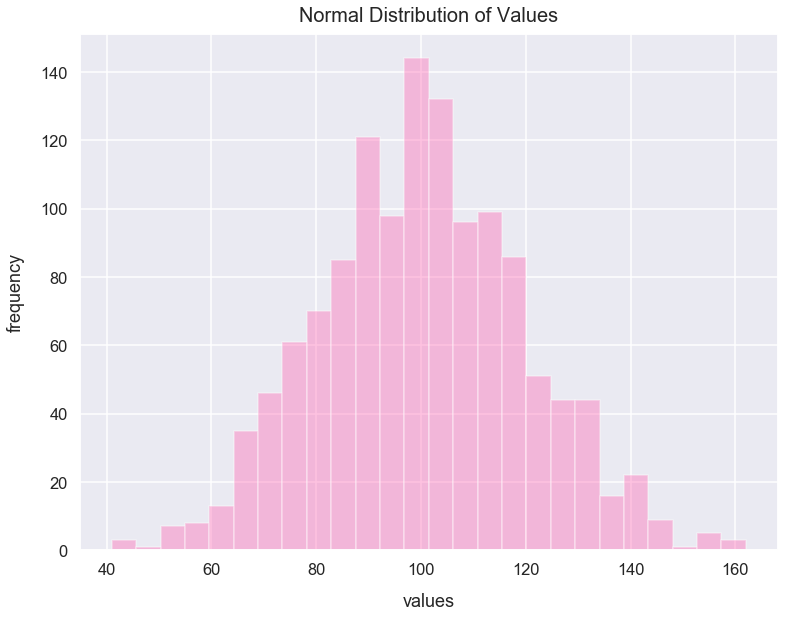

In [154]:
sns.distplot(normal_distr_values, kde=False, color='hotpink')
plt.title("Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("frequency", labelpad=15);

When we say the data is "normally distributed", the normal distribution should have the following characteristics:

- symmetry about the center
- mean = median = mode
- roughly 50% values less than the mean and 50% greater than the mean

From a visual standpoint, it looks like our distribution above has symmetry around the center.

Let's check the mean, median and mode values are roughly equal to one another.

##### Mean of Values

In [155]:
mean = round(np.mean(normal_distr_values), 3)
mean

100.325

##### Median of Values

In [156]:
median = round(np.median(normal_distr_values), 3)
median

100.0

##### Mode of Values

In [157]:
mode = scipy.stats.mode(normal_distr_values)
mode

ModeResult(mode=array([101]), count=array([35]))

100 equals 100 which is very close to 101. So, it seems in this dataset that the mean, median and mode are the same values.

##### Verify 50% of values less than mean and 50% above mean

In [158]:
count_values_above_mean = 0

for value in normal_distr_values:
    if value>=mean:
        count_values_above_mean+=1

count_values_above_mean

643

In [159]:
count_values_below_mean = len(normal_distr_values) - count_values_above_mean
count_values_below_mean

657

643 values are above the mean and 657 values are below the mean. This roughly fits our criteria to help prove that this is a normal distribution.

### Standard Deviations with a Normal Distribution

For the `normal_distr_values` we plotted above in a histogram. I can also plot it in KDE form which you can simply think of as a line of best fit to smooth out the histogram. You can learn more about KDE plots in Python through this great Jake Vanderplas <a href='https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/'>article</a>. 

Below is our result.

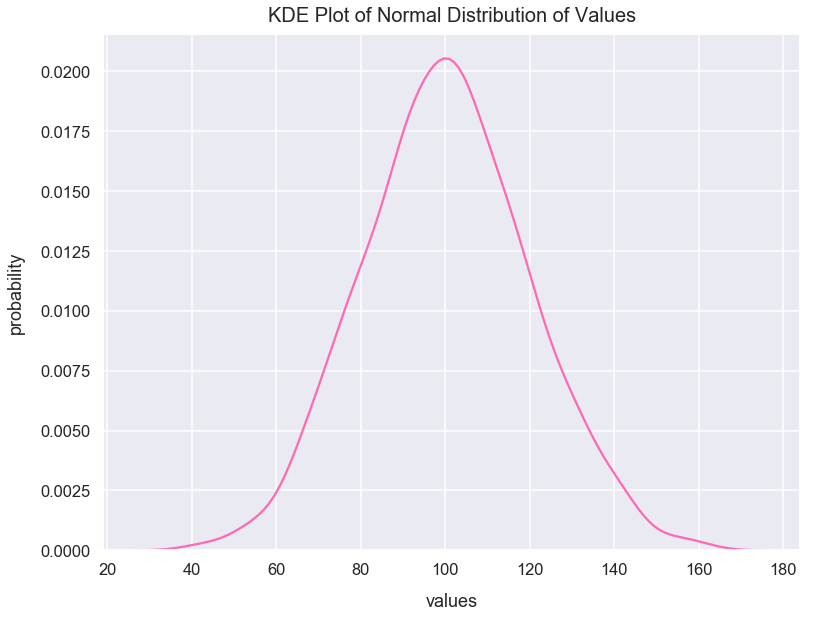

In [160]:
sns.distplot(normal_distr_values, rug=False, hist=False, color='hotpink')
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);

Let's calculate the values for one, two and three positive standard deviations from the mean of `normal_distr_values`, and one, two and three negative standard deviations from the mean of `normal_distr_values`.

In [161]:
plus_one_std_dev = np.mean(normal_distr_values) + np.std(normal_distr_values)
minus_one_std_dev = np.mean(normal_distr_values) - np.std(normal_distr_values)

plus_two_std_dev = np.mean(normal_distr_values) + 2*np.std(normal_distr_values)
minus_two_std_dev = np.mean(normal_distr_values) - 2*np.std(normal_distr_values)

plus_three_std_dev = np.mean(normal_distr_values) + 3*np.std(normal_distr_values)
minus_three_std_dev = np.mean(normal_distr_values) - 3*np.std(normal_distr_values)

Since we have a normal distribution, the following logic on standard deviations applies to this dataset.

Here's a <a href='https://stackoverflow.com/questions/49099765/partial-shade-of-distribution-plot-using-seaborn' rel='nofollow'> Stack Overflow article</a> with good code on how to use shading under plots in Matplotlib.

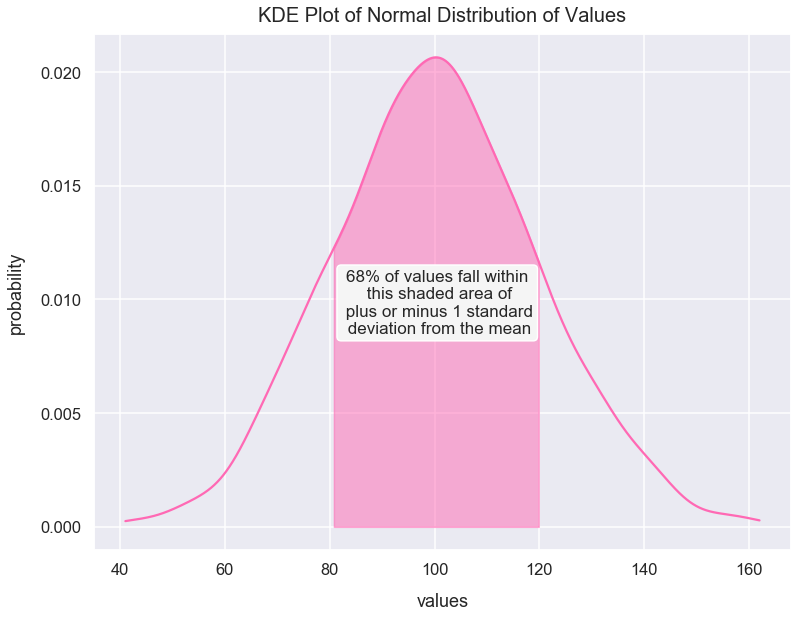

In [169]:
kde = scipy.stats.gaussian_kde(normal_distr_values)
pos = np.linspace(min(normal_distr_values), max(normal_distr_values), 50000)
plt.plot(pos, kde(pos), color='hotpink')
shade = np.linspace(minus_one_std_dev, plus_one_std_dev, 300)
plt.fill_between(shade, kde(shade), alpha=0.5, color='hotpink',)
plt.text(x=100.5, y=.0085, horizontalalignment='center', fontsize=17, 
         s="68% of values fall within\nthis shaded area of\nplus or minus 1 standard\ndeviation from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);

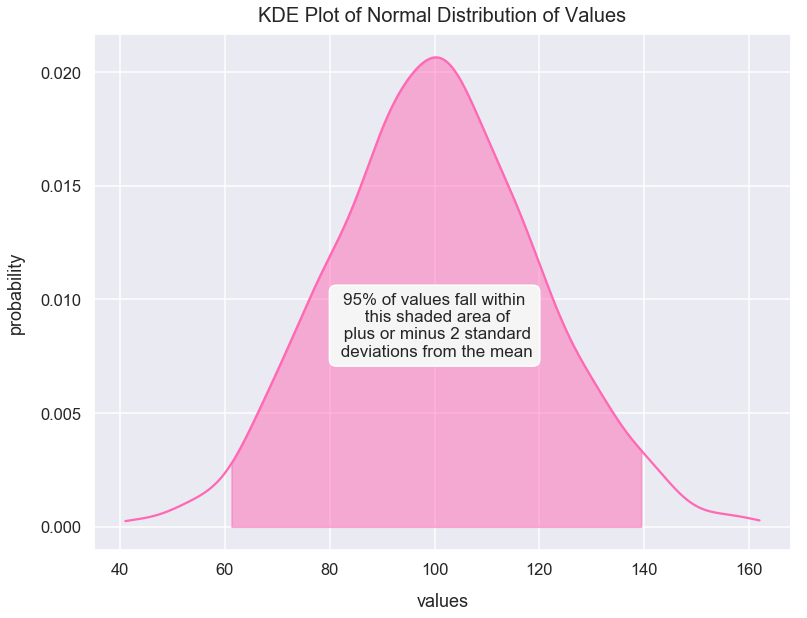

In [163]:
kde = scipy.stats.gaussian_kde(normal_distr_values)
pos = np.linspace(min(normal_distr_values), max(normal_distr_values), 5000)
plt.plot(pos, kde(pos), color='hotpink')
shade = np.linspace(minus_two_std_dev, plus_two_std_dev, 300)
plt.fill_between(shade, kde(shade), alpha=0.5, color='hotpink')
plt.text(x=100, y=.0075, horizontalalignment='center', fontsize=17, 
         s="95% of values fall within\nthis shaded area of\n plus or minus 2 standard\ndeviations from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);

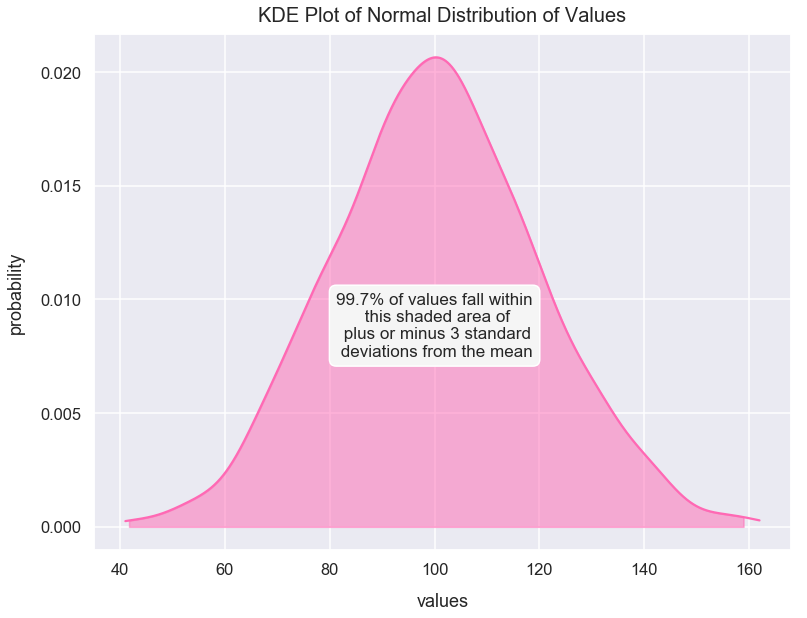

In [164]:
kde = scipy.stats.gaussian_kde(normal_distr_values)
pos = np.linspace(min(normal_distr_values), max(normal_distr_values), 5000)
plt.plot(pos, kde(pos), color='hotpink')
shade = np.linspace(minus_three_std_dev, plus_three_std_dev, 300)
plt.fill_between(shade, kde(shade), alpha=0.5, color='hotpink',)
plt.text(x=100, y=.0075, horizontalalignment='center', fontsize=17, 
         s="99.7% of values fall within\nthis shaded area of\nplus or minus 3 standard\ndeviations from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);